#HackerEarth Machine Learning Challenge: How NOT to lose a customer in 10 days

#Churn rate  prediction projects using collaboratory

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. . Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:


*  User demographic information
*  Browsing behavior
*  Historical purchase data among other information

It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

#Task
An up-and-coming startup is keen on reducing its customer churn and has hired you as a Machine Learning engineer for this task. As an expert, you are required to build a sophisticated Machine Learning model that predicts the churn score for a website based on multiple features.

#Problem statement

No business can thrive without it’s customers. On the flip side, customers leaving the business is a nightmare that every business owner dreads!

In fact, one of the key metrics to measure a business’ success is by measuring its customer churn rate - the lower the churn, the more loved the company is. 

Typically, every user of a product or a service is assigned a prediction value that estimates their state of churn at any given time. This value may be based on multiple factors such as the user’s demographic, their browsing behavior and historical purchase data, among other details.

This value factors in unique and proprietary predictions of how long a user will remain a customer and is updated every day for all users who have purchased at least one of the products/services. The values assigned are between 1 and 5.

#Loading the datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
print(train.shape)
print(test.shape)

(36992, 25)
(19919, 24)


#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, confusion_matrix,f1_score
import sklearn.base as skb
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import sklearn.linear_model as sklm


import warnings
warnings.filterwarnings("ignore")

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
train.shape

(36992, 25)

In [ ]:
test.shape

(19919, 24)

In [ ]:
train_copy=train.copy()
test_copy=test.copy()

In [ ]:
print('Train columns:-\n',train.columns)
print("Test columns:-\n",test.columns)

Train columns:-
 Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')
Test columns:-
 Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used

In [ ]:
train.head()

customer_id  ... churn_risk_score
0      fffe4300490044003600300030003800  ...                2
1  fffe43004900440032003100300035003700  ...                1
2      fffe4300490044003100390032003600  ...                5
3  fffe43004900440036003000330031003600  ...                5
4  fffe43004900440031003900350030003600  ...                5

[5 rows x 25 columns]

In [ ]:
test.head()

customer_id  ...              feedback
0  fffe43004900440031003700300030003400  ...  Poor Product Quality
1  fffe43004900440031003900370037003300  ...          Poor Website
2  fffe43004900440034003800360037003000  ...   No reason specified
3  fffe43004900440036003200370033003400  ...          Too many ads
4  fffe43004900440035003000370031003900  ...          Poor Website

[5 rows x 24 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

Shape of training data and test data

In [ ]:
print(train.shape)
print(test.shape)

(36992, 25)
(19919, 24)


Types  of variable

In [ ]:
train.dtypes

customer_id                      object
Name                             object
age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64


Firstly lets drop customerID Name and security_no columns becasue there's no need of those columns.Using drop() function.

In [ ]:
train.drop('customer_id',axis='columns',inplace=True)
train.drop('Name',axis='columns',inplace=True)
train.drop('security_no',axis='columns',inplace=True)
train.drop('referral_id',axis='columns',inplace=True)

In [ ]:
test.drop('customer_id',axis='columns',inplace=True)
test.drop('Name',axis='columns',inplace=True)
test.drop('security_no',axis='columns',inplace=True)
test.drop('referral_id',axis='columns',inplace=True)

In [ ]:
train.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

So we have successfully removed all zero importance column from the  data frame.

In [ ]:
train.head()

age gender  ...                  feedback churn_risk_score
0   18      F  ...  Products always in Stock                2
1   32      F  ...     Quality Customer Care                1
2   44      F  ...              Poor Website                5
3   37      M  ...              Poor Website                5
4   31      F  ...              Poor Website                5

[5 rows x 21 columns]

#Data Exploration (EDA)
Here i'll explore my churn data and do some visualization to my data to genrate insight from it. For representing the data in graphs i will use matplotlib,seaborn and plotly.

In [ ]:
train.isnull().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

So now we've total 3 columns which having null values

In [ ]:
test.isnull().sum()

age                                0
gender                             0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [ ]:
#train.dropna(how='all',subset=['preferred_offer_types'])

#Null values exploration with Heatmap

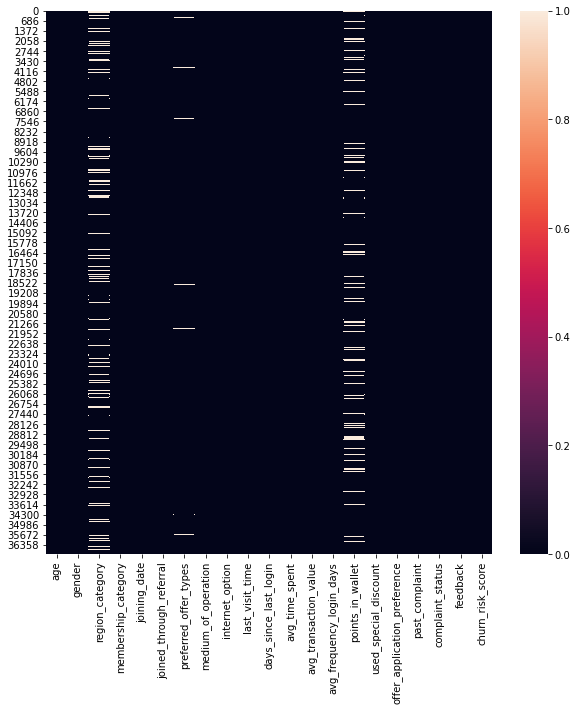

In [ ]:
#Using heatmap to check how our null values looks
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull())

In [ ]:
# get the number of missing data points per column
missing_values_count = train.isnull().sum()
missing_values_count1=test.isnull().sum()

In [ ]:
total_cells=np.product(train.shape)
total_missing=missing_values_count.sum()
print('Percent of data that is missing:-',(total_missing/total_cells)*100)

Percent of data that is missing:- 1.1790194018783984


In [ ]:
total_cells=np.product(test.shape)
total_missing=missing_values_count.sum()
print('Percent of data that is missing:-',(total_missing/total_cells)*100)

Percent of data that is missing:- 2.2990611978512976


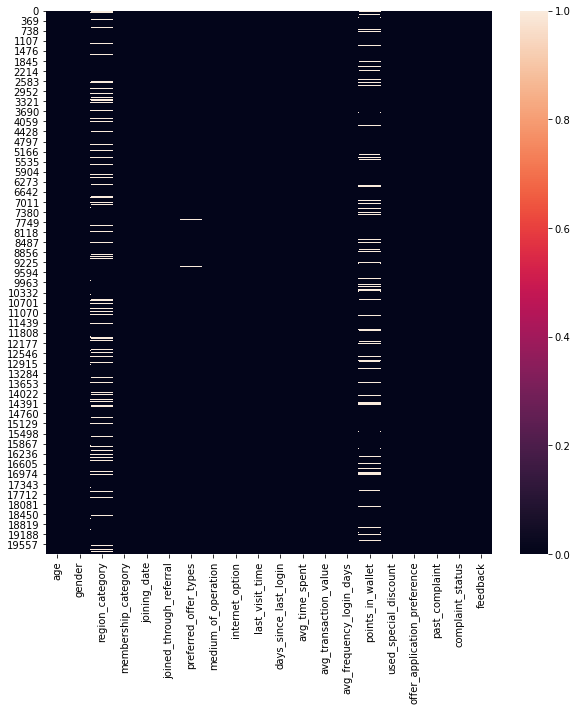

In [ ]:
#test data
plt.figure(figsize=(10,10))
sns.heatmap(test.isnull())

#Removing the null values

Here i'm removing all the null values from the column 'points_in_wallet' using statistical mean method mean() and filling those empty values with fillna() 

In [ ]:
train['region_category'].fillna("No region mentioned",inplace=True)
train['preferred_offer_types'].fillna("No_Info",inplace=True)
test['region_category'].fillna("No region mentioned",inplace=True)
test['preferred_offer_types'].fillna("No_Info",inplace=True)

In [ ]:
x =train["points_in_wallet"].mean()
train["points_in_wallet"].fillna(x, inplace = True)

In [ ]:
x =test["points_in_wallet"].mean()
test["points_in_wallet"].fillna(x, inplace = True)

In [ ]:
train['region_category'].value_counts()

Town                   14128
City                   12737
No region mentioned     5428
Village                 4699
Name: region_category, dtype: int64

Droping few null values in dataset 

In [ ]:
train.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

All the null values are removed from the dataset.Lets check test dataset as well

My null values in points_in_wallet column got filled with mean method .

In [ ]:
test.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

Here you can  notice through the help of mean function my all null values in column "points_in_wallet" are removed

Later i will change -1 to positive figure, but first let me describe the training dataset. 

In [ ]:
# describing the training set
train.describe(include = 'all')

age gender  ...              feedback churn_risk_score
count   36992.000000  36992  ...                 36992     36992.000000
unique           NaN      3  ...                     9              NaN
top              NaN      F  ...  Poor Product Quality              NaN
freq             NaN  18490  ...                  6350              NaN
mean       37.118161    NaN  ...                   NaN         3.463397
std        15.867412    NaN  ...                   NaN         1.409661
min        10.000000    NaN  ...                   NaN        -1.000000
25%        23.000000    NaN  ...                   NaN         3.000000
50%        37.000000    NaN  ...                   NaN         4.000000
75%        51.000000    NaN  ...                   NaN         5.000000
max        64.000000    NaN  ...                   NaN         5.000000

[11 rows x 21 columns]

In [ ]:
train['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [ ]:
train['avg_frequency_login_days'].replace({'Error':0},inplace=True)
test['avg_frequency_login_days'].replace({'Error':0},inplace=True)

In [ ]:
train['avg_frequency_login_days']=train['avg_frequency_login_days'].astype('float64')

In [ ]:
test['avg_frequency_login_days']=train['avg_frequency_login_days'].astype('float')

#Here i'm changing the negative values into positive figure.

In [ ]:
# Dropping all rows whose 'points_in_wallet' is negative 
l1 = np.where(train['points_in_wallet'] < 0)
train.drop(l1[0],inplace=True)
train.index = range(0,train.shape[0])

In [ ]:
# Dropping all rows whose 'avg_frequency_login_days' is negative 
l2 = np.where(train['avg_frequency_login_days'] < 0)
train.drop(l2[0],inplace=True)
train.index = range(0,train.shape[0])

In [ ]:
# Dropping all rows whose 'avg_transaction_value' is negative 
l3 = np.where(train['avg_transaction_value'] < 0)
train.drop(l3[0],inplace=True)
train.index = range(0,train.shape[0])

In [ ]:
# Dropping all rows whose 'days_since_last_login' is negative 
l4 = np.where(train['days_since_last_login'] < 0)
train.drop(l4[0],inplace=True)
train.index = range(0,train.shape[0])

In [ ]:
#train['churn_risk_score']=train['churn_risk_score'].abs()
l5 = np.where(train['churn_risk_score'] == -1)
train.drop(l5[0],inplace=True)
train.index = range(0,train.shape[0])

In [ ]:
'''train['avg_time_spent']=train['avg_time_spent'].abs()
test['avg_time_spent']=test['avg_time_spent'].abs()'''

"train['avg_time_spent']=train['avg_time_spent'].abs()\ntest['avg_time_spent']=test['avg_time_spent'].abs()"

See  after changing the -1 to postive my 1 churn score got increases

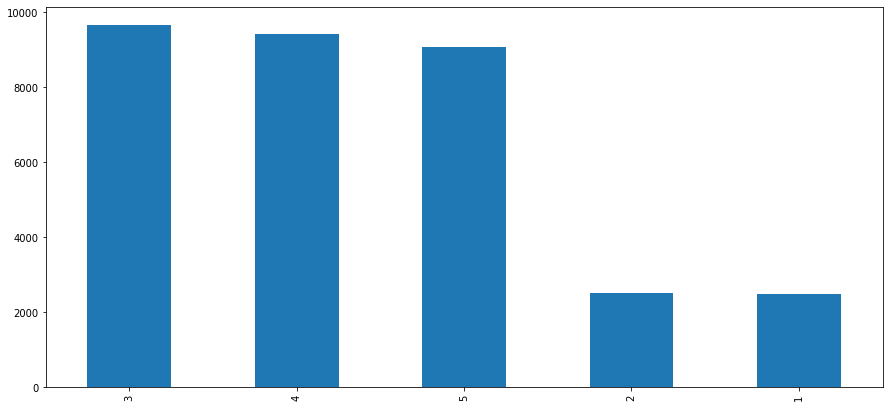

In [ ]:
train['churn_risk_score'].value_counts(normalize=True)
train['churn_risk_score'].value_counts().plot.bar(figsize=(15,7),label='churn_risk_score')

#Data Distribution 

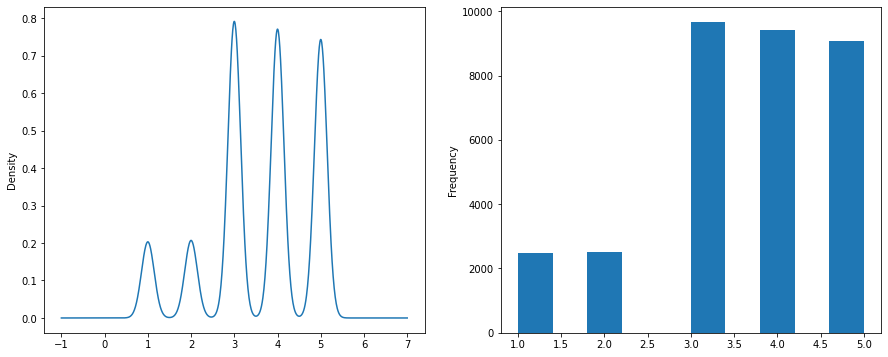

In [ ]:
plt.figure(1)
plt.subplot(121)
train['churn_risk_score'].plot(kind='kde',figsize=(8,6))
plt.subplot(122)
train['churn_risk_score'].plot(kind='hist',figsize=(15,6))
plt.show()

In [ ]:
train['avg_frequency_login_days'].value_counts()

0.000000     3228
13.000000    1275
8.000000     1251
14.000000    1246
17.000000    1240
             ... 
49.461645       1
33.147512       1
53.812360       1
47.535629       1
31.504496       1
Name: avg_frequency_login_days, Length: 876, dtype: int64

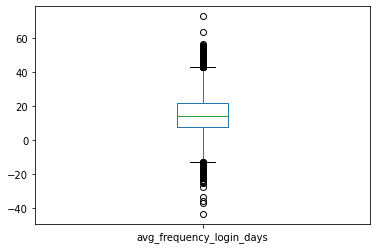

In [ ]:
test['avg_frequency_login_days'].astype('float64').plot(kind='box')

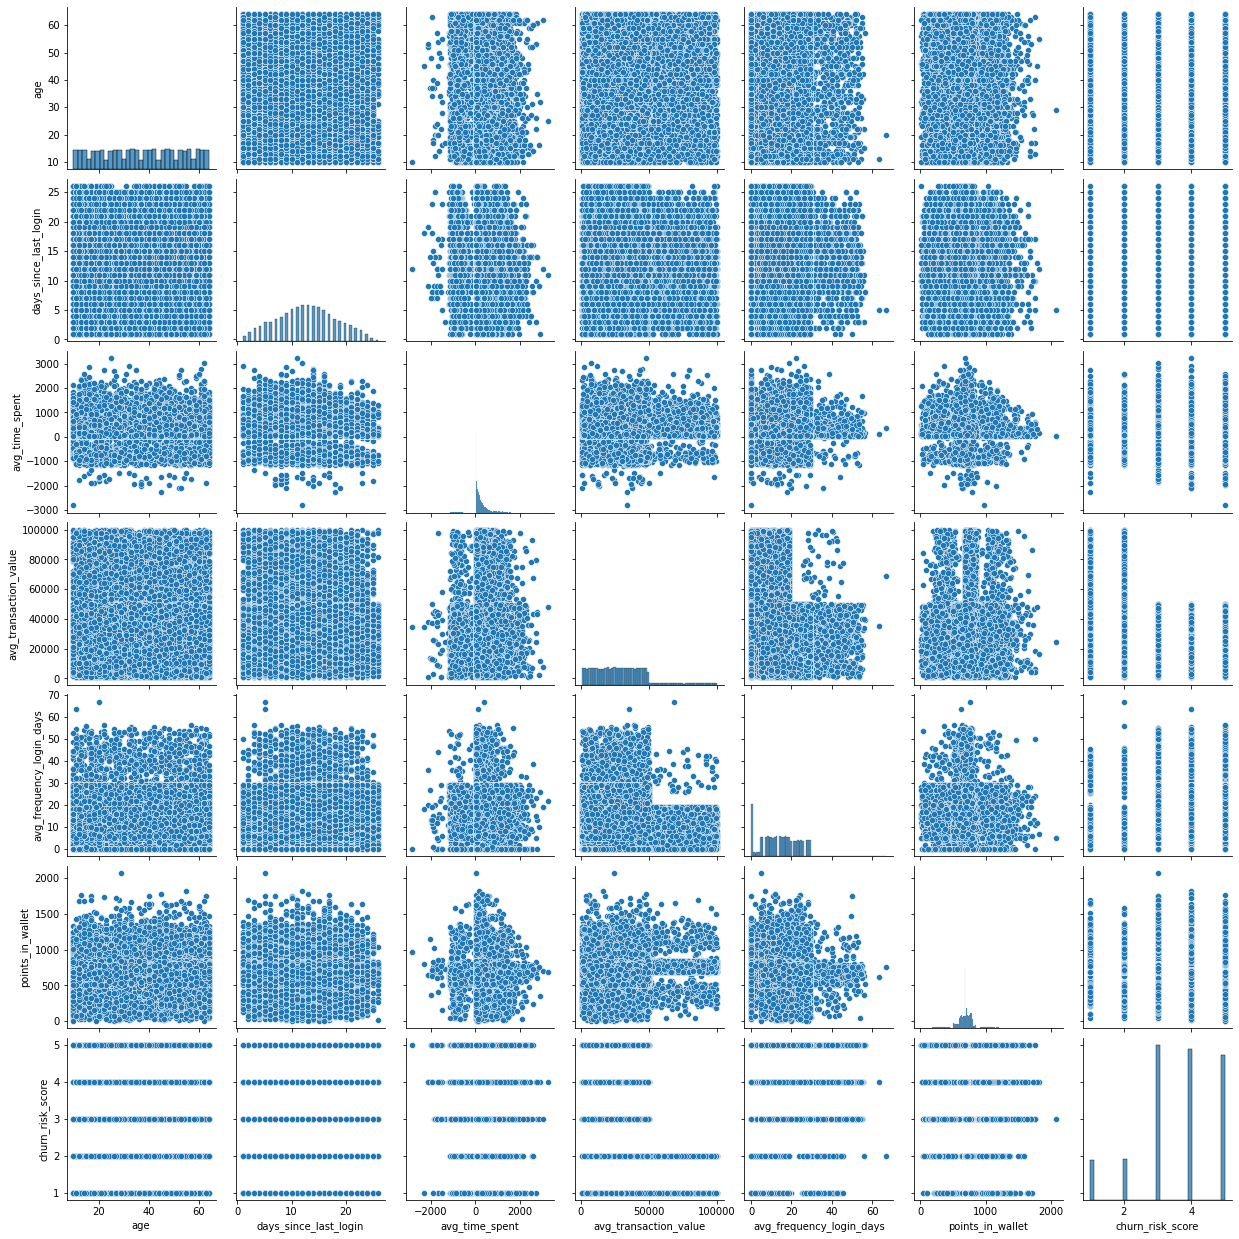

In [ ]:
sns.pairplot(train)

In [ ]:
train.dtypes
#train.head()

age                               int64
gender                           object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days        float64
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [ ]:
train['joining_date']

0        2017-08-17
1        2017-08-28
2        2016-11-11
3        2016-10-29
4        2017-09-12
            ...    
33137    2017-09-21
33138    2016-06-27
33139    2016-09-11
33140    2017-06-15
33141    2015-10-23
Name: joining_date, Length: 33142, dtype: object

In [ ]:
test['joining_date']

0        2015-11-02
1        2016-03-01
2        2017-03-03
3        2017-08-18
4        2015-05-05
            ...    
19914    2015-01-25
19915    2017-12-31
19916    2015-09-09
19917    2016-04-17
19918    2017-10-30
Name: joining_date, Length: 19919, dtype: object

In [ ]:
train.head()

age gender  ...                  feedback churn_risk_score
0   18      F  ...  Products always in Stock                2
1   32      F  ...     Quality Customer Care                1
2   44      F  ...              Poor Website                5
3   37      M  ...              Poor Website                5
4   31      F  ...              Poor Website                5

[5 rows x 21 columns]

In [ ]:
train.drop('joining_date',axis='columns',inplace=True)
train.drop('last_visit_time',axis='columns',inplace=True)

In [ ]:
test.drop('joining_date',axis='columns',inplace=True)
test.drop('last_visit_time',axis='columns',inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33142 entries, 0 to 33141
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           33142 non-null  int64  
 1   gender                        33142 non-null  object 
 2   region_category               33142 non-null  object 
 3   membership_category           33142 non-null  object 
 4   joined_through_referral       33142 non-null  object 
 5   preferred_offer_types         33142 non-null  object 
 6   medium_of_operation           33142 non-null  object 
 7   internet_option               33142 non-null  object 
 8   days_since_last_login         33142 non-null  int64  
 9   avg_time_spent                33142 non-null  float64
 10  avg_transaction_value         33142 non-null  float64
 11  avg_frequency_login_days      33142 non-null  float64
 12  points_in_wallet              33142 non-null  float64
 13  u

In [ ]:
train.head()

age gender  ...                  feedback churn_risk_score
0   18      F  ...  Products always in Stock                2
1   32      F  ...     Quality Customer Care                1
2   44      F  ...              Poor Website                5
3   37      M  ...              Poor Website                5
4   31      F  ...              Poor Website                5

[5 rows x 19 columns]

In [ ]:
train['membership_category'].value_counts()

Basic Membership       6920
No Membership          6870
Gold Membership        6090
Silver Membership      5372
Premium Membership     3986
Platinum Membership    3904
Name: membership_category, dtype: int64

In [ ]:
train['medium_of_operation'].replace({'?':'No_Information'},inplace=True)
test['medium_of_operation'].replace({'?':'No_Information'},inplace=True)

In [ ]:
train['medium_of_operation'].value_counts()

Smartphone        12478
Desktop           12429
No_Information     4836
Both               3399
Name: medium_of_operation, dtype: int64

In [ ]:
train['complaint_status'].value_counts()

Not Applicable              16699
Solved                       4156
Unsolved                     4154
Solved in Follow-up          4093
No Information Available     4040
Name: complaint_status, dtype: int64

In [ ]:
train['joined_through_referral'].value_counts()

No     14249
Yes    14000
?       4893
Name: joined_through_referral, dtype: int64

In [ ]:
train['joined_through_referral'].replace({'?':'No_info_available'},inplace=True)
test['joined_through_referral'].replace({'?':'No_info_available'},inplace=True)

In [ ]:
train['joined_through_referral'].value_counts()

No                   14249
Yes                  14000
No_info_available     4893
Name: joined_through_referral, dtype: int64

In [ ]:
train['feedback'].value_counts()

Poor Product Quality        5704
Poor Website                5644
Too many ads                5618
Poor Customer Service       5593
No reason specified         5577
Reasonable Price            1273
User Friendly Website       1253
Products always in Stock    1247
Quality Customer Care       1233
Name: feedback, dtype: int64

In [ ]:
train['preferred_offer_types'].value_counts()

Gift Vouchers/Coupons       11060
Credit/Debit Card Offers    10976
Without Offers              10848
No_Info                       258
Name: preferred_offer_types, dtype: int64

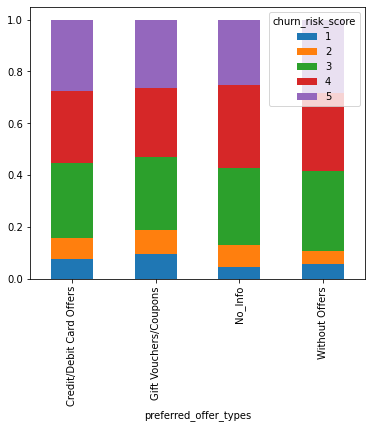

In [ ]:
offer=pd.crosstab(train['preferred_offer_types'],train['churn_risk_score'])
offer.div(offer.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))

Yes    18287
No     14855
Name: offer_application_preference, dtype: int64


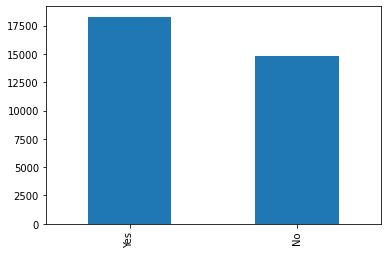

In [ ]:
print(train['offer_application_preference'].value_counts())
train['offer_application_preference'].value_counts().plot.bar()

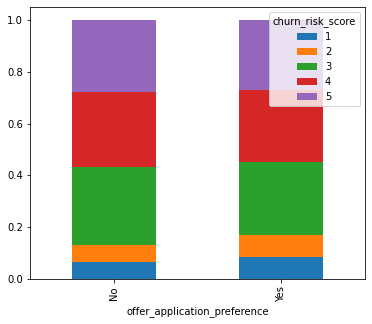

In [ ]:
offer_application=pd.crosstab(train['offer_application_preference'],train['churn_risk_score'])
offer_application.div(offer_application.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(6,5))

In [ ]:
train['region_category'].value_counts()

Town                   12657
City                   11399
No region mentioned     4874
Village                 4212
Name: region_category, dtype: int64

Creating pie chart to show how many % employes belongs to town,city and village.

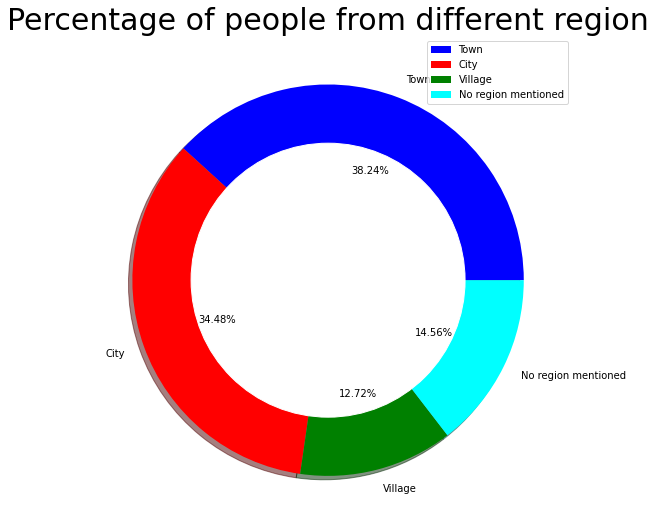

In [ ]:
size=[14128,12737,4699,5379]
colors=['blue','red','green','cyan']
label= 'Town','City','Village','No region mentioned'
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = label, shadow = True, autopct = '%.2f%%')
plt.title('Percentage of people from different region', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

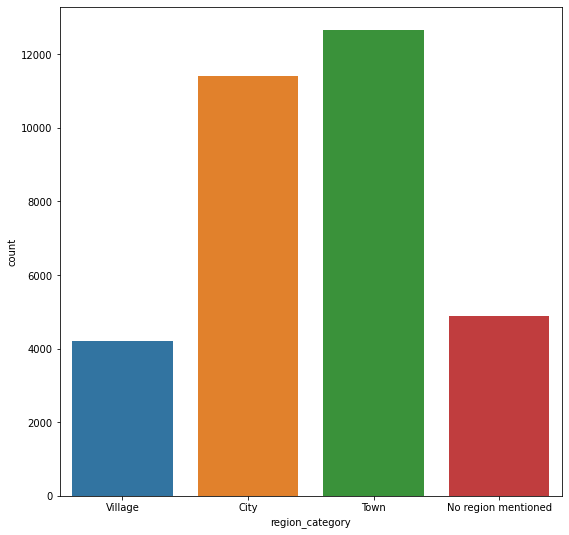

In [ ]:
sns.countplot(train['region_category'])

Printing out the unique entries from all the columns.

In [ ]:
#Getting unique values from all the columns 
#for cols in train:
  #print(train[cols].unique())

#Univariate Analysis

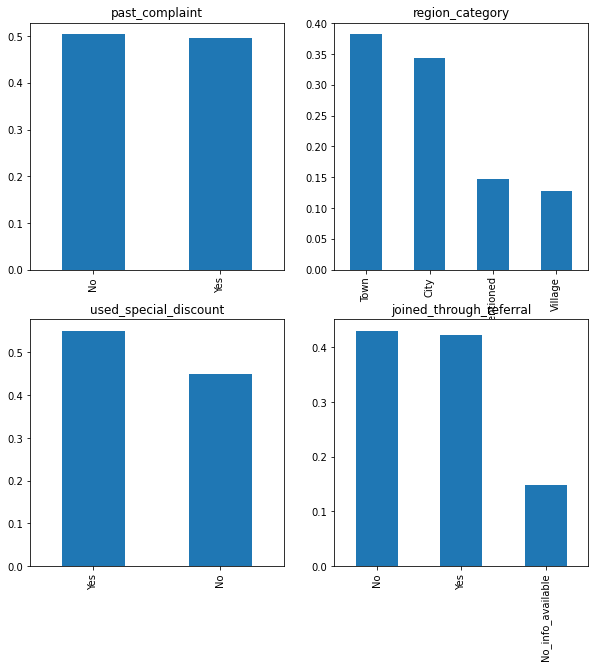

In [ ]:
plt.figure(1)
plt.subplot(221)
train['past_complaint'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="past_complaint")
plt.subplot(222)
train['region_category'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="region_category")
plt.subplot(223)
train['used_special_discount'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="used_special_discount")
plt.subplot(224)
train['joined_through_referral'].value_counts(normalize=True).plot.bar(figsize=(10,10),title="joined_through_referral")
plt.show()

In [ ]:
#Replacing Unknown values with Male counts
'''train['gender'].replace({'Unknown':'M'},inplace=True)
test['gender'].replace({'Unknown':'M'},inplace=True)'''

"train['gender'].replace({'Unknown':'M'},inplace=True)\ntest['gender'].replace({'Unknown':'M'},inplace=True)"

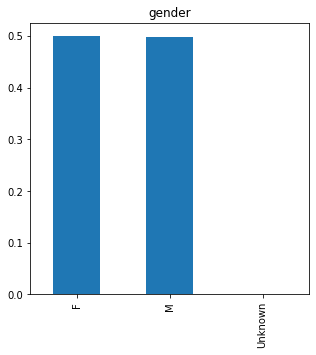

In [ ]:
train['gender'].value_counts(normalize=True).plot.bar(figsize=(5,5),title="gender")

Yes    18247
No     14895
Name: used_special_discount, dtype: int64


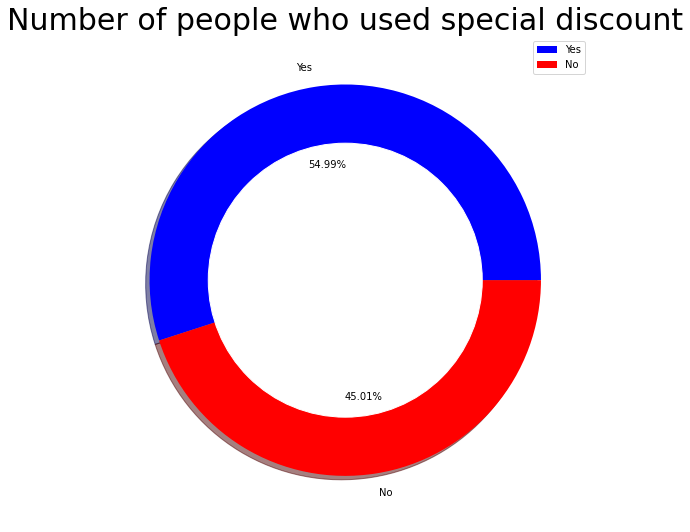

In [ ]:
print(train['used_special_discount'].value_counts())
size=[20342,16650]
colors=['blue','red']
label= 'Yes','No'
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = label, shadow = True, autopct = '%.2f%%')
plt.title('Number of people who used special discount', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

In [ ]:
#train.columns

In [ ]:
def diff_bar(x,y): 
    train.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

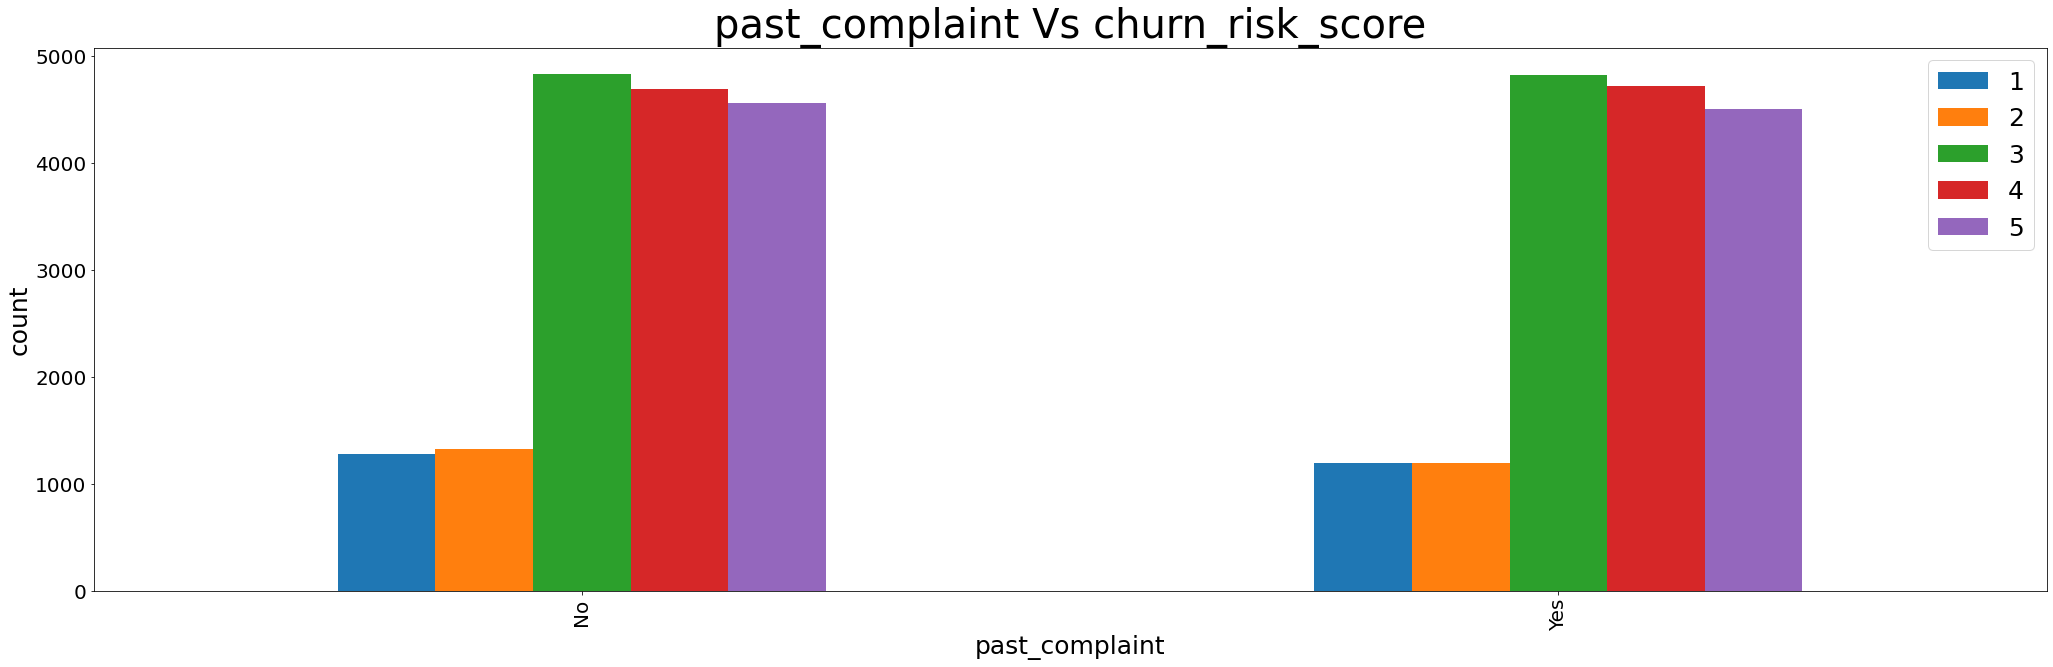

In [ ]:
diff_bar('past_complaint','churn_risk_score')

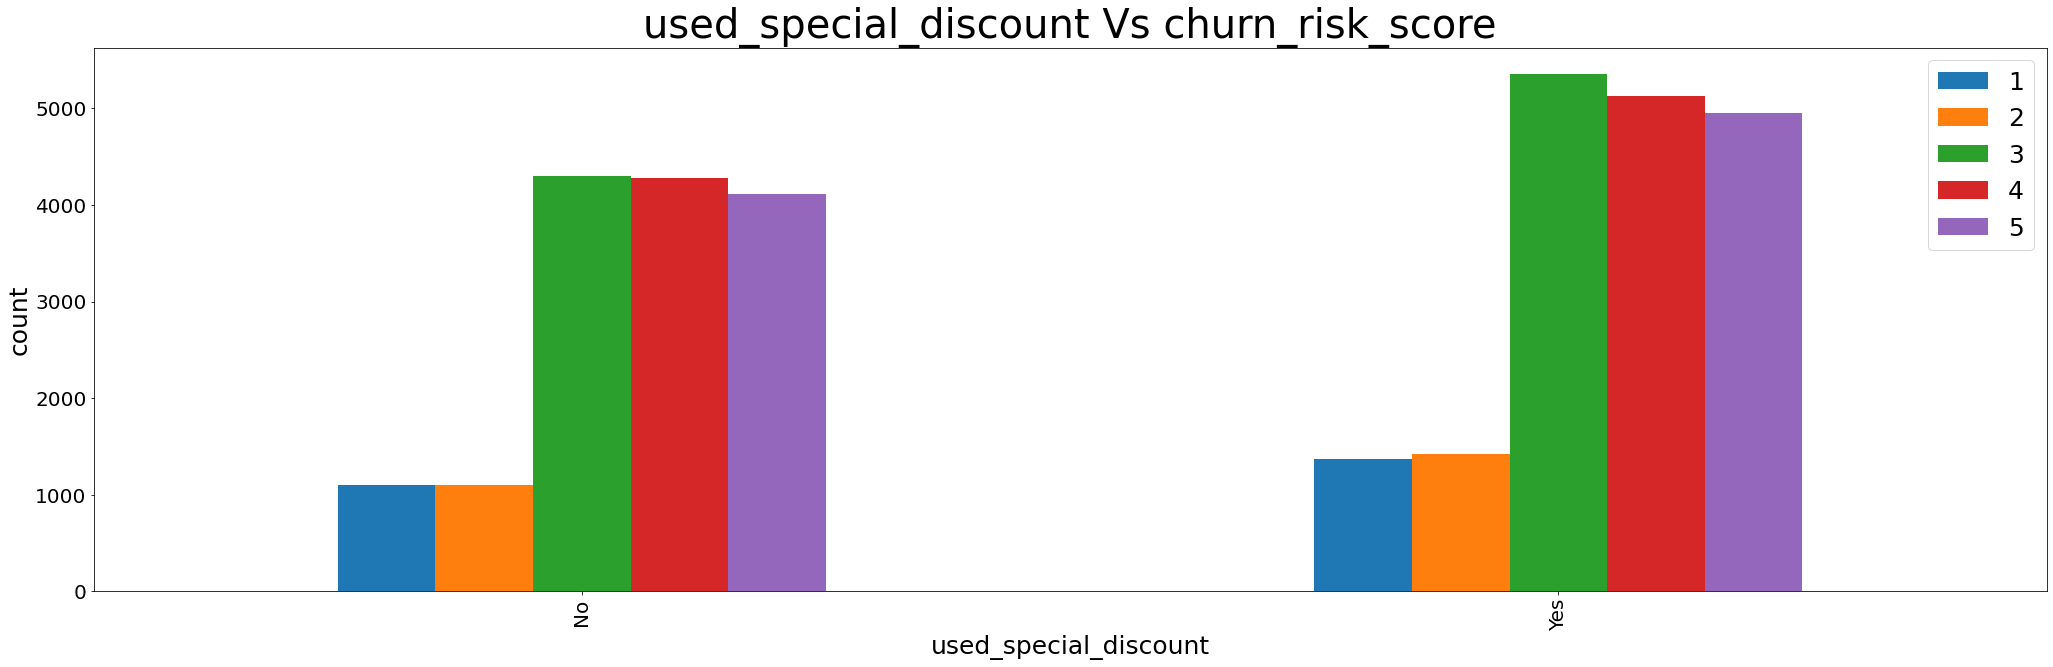

In [ ]:
diff_bar('used_special_discount','churn_risk_score')

In [ ]:
#Function to check wheather there's unique value present in columns
def print_unique_col_values(my_data):
        
       for columns in my_data:
              #Checking wheather column are object type or not 
            if my_data[columns].dtypes=='object':
              
                print(f'{columns}: {my_data[columns].unique()}')

In [ ]:
print_unique_col_values(train)

gender: ['F' 'M' 'Unknown']
region_category: ['Village' 'City' 'Town' 'No region mentioned']
membership_category: ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joined_through_referral: ['No' 'No_info_available' 'Yes']
preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers'
 'No_Info']
medium_of_operation: ['No_Information' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
used_special_discount: ['Yes' 'No']
offer_application_preference: ['Yes' 'No']
past_complaint: ['No' 'Yes']
complaint_status: ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback: ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


#Data Preprocessing 
Here i'm going to to covert Yes and No values into number format,Becasue our ML model won't be able predict text data ,so now i will replace those text  values with 1 and 0.

In [ ]:
#train['gender'].replace({'F':1,'M':0},inplace=True)
train['joined_through_referral'].replace({'Yes':1,'No':0},inplace=True)
train['past_complaint'].replace({'Yes':1,'No':0},inplace=True)
train['offer_application_preference'].replace({'Yes':1,'No':0},inplace=True)
train['used_special_discount'].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
#test['gender'].replace({'F':1,'M':0},inplace=True)
test['joined_through_referral'].replace({'Yes':1,'No':0},inplace=True)
test['past_complaint'].replace({'Yes':1,'No':0},inplace=True)
test['offer_application_preference'].replace({'Yes':1,'No':0},inplace=True)
test['used_special_discount'].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
print_unique_col_values(train)

gender: ['F' 'M' 'Unknown']
region_category: ['Village' 'City' 'Town' 'No region mentioned']
membership_category: ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joined_through_referral: [0 'No_info_available' 1]
preferred_offer_types: ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers'
 'No_Info']
medium_of_operation: ['No_Information' 'Desktop' 'Smartphone' 'Both']
internet_option: ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
complaint_status: ['Not Applicable' 'Solved' 'Solved in Follow-up' 'Unsolved'
 'No Information Available']
feedback: ['Products always in Stock' 'Quality Customer Care' 'Poor Website'
 'No reason specified' 'Poor Product Quality' 'Poor Customer Service'
 'Too many ads' 'User Friendly Website' 'Reasonable Price']


In [ ]:
print_unique_col_values(test)

gender: ['F' 'M' 'Unknown']
region_category: ['Village' 'Town' 'City' 'No region mentioned']
membership_category: ['Premium Membership' 'Gold Membership' 'Silver Membership'
 'No Membership' 'Basic Membership' 'Platinum Membership']
joined_through_referral: [0 1 'No_info_available']
preferred_offer_types: ['Without Offers' 'Gift Vouchers/Coupons' 'Credit/Debit Card Offers'
 'No_Info']
medium_of_operation: ['Smartphone' 'Desktop' 'Both' 'No_Information']
internet_option: ['Wi-Fi' 'Fiber_Optic' 'Mobile_Data']
complaint_status: ['Not Applicable' 'Solved in Follow-up' 'No Information Available'
 'Unsolved' 'Solved']
feedback: ['Poor Product Quality' 'Poor Website' 'No reason specified'
 'Too many ads' 'Reasonable Price' 'Poor Customer Service'
 'User Friendly Website' 'Products always in Stock'
 'Quality Customer Care']


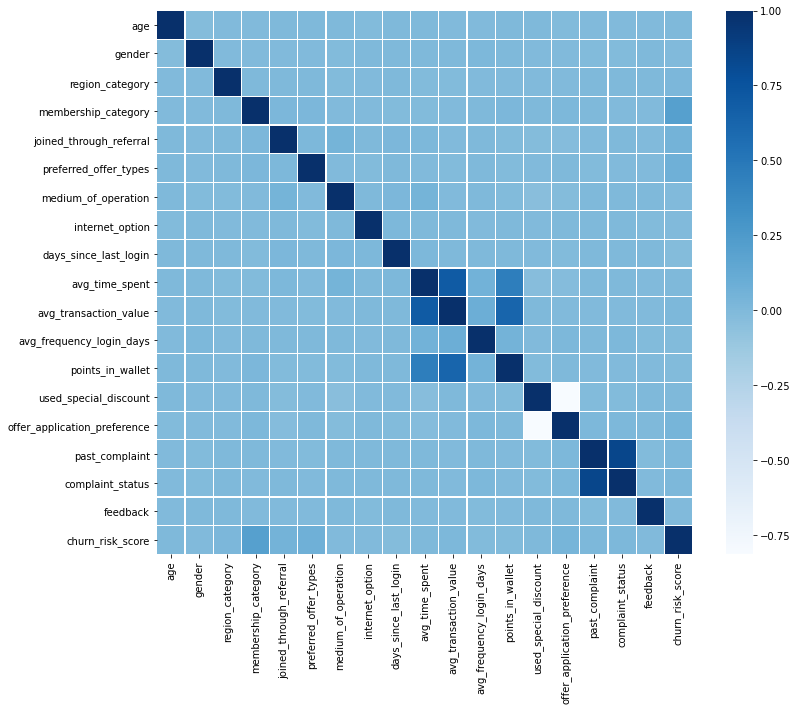

In [ ]:
#We plot the correlation matrix, the darker a box is, the more features are correlated
corr=plt.figure(figsize=(12, 10))

corr = train.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap='Blues')

#Plotly 
Visual classification of important feature in the dataset.Considering churn_risk_score as our Target feature.

In [ ]:
fig = px.parallel_categories(train[['age', 'gender','region_category','joined_through_referral','past_complaint','complaint_status','used_special_discount','feedback',
                                    'churn_risk_score']],
                             color="churn_risk_score", 
                             color_continuous_scale=px.colors.sequential.Aggrnyl )
                             
fig.show()

# One Hot Encoding 
Now i will use pandas dummies fuction to create few more columns and i will convert those columns values into number.

In [ ]:
train = pd.get_dummies(data=train, columns=['gender','region_category','medium_of_operation','preferred_offer_types'
                                           ,'complaint_status','internet_option','membership_category','feedback','joined_through_referral'])
train.sample(3)

age  ...  joined_through_referral_No_info_available
5988    42  ...                                          0
16186   58  ...                                          0
24213   19  ...                                          0

[3 rows x 51 columns]

In [ ]:
test = pd.get_dummies(data=test, columns=['gender','region_category','medium_of_operation','preferred_offer_types'
                                           ,'complaint_status','internet_option','membership_category','feedback','joined_through_referral'])
test.sample(3)

age  ...  joined_through_referral_No_info_available
13222   30  ...                                          0
14534   55  ...                                          0
8492    16  ...                                          1

[3 rows x 50 columns]

In [ ]:
print_unique_col_values(train)

In [ ]:
train.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'churn_risk_score', 'gender_F', 'gender_M',
       'gender_Unknown', 'region_category_City',
       'region_category_No region mentioned', 'region_category_Town',
       'region_category_Village', 'medium_of_operation_Both',
       'medium_of_operation_Desktop', 'medium_of_operation_No_Information',
       'medium_of_operation_Smartphone',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_No_Info', 'preferred_offer_types_Without Offers',
       'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved',
       'internet_option_Fiber_Optic', 'inter

In [ ]:
test.columns

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'gender_F', 'gender_M', 'gender_Unknown',
       'region_category_City', 'region_category_No region mentioned',
       'region_category_Town', 'region_category_Village',
       'medium_of_operation_Both', 'medium_of_operation_Desktop',
       'medium_of_operation_No_Information', 'medium_of_operation_Smartphone',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_No_Info', 'preferred_offer_types_Without Offers',
       'complaint_status_No Information Available',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved',
       'internet_option_Fiber_Optic', 'internet_option_Mobile_Data',
  

Feature Importance

In [ ]:
'''plt.figure(figsize=(15,8))
train.corr()['churn_risk_score'].sort_values(ascending = True).plot(kind='barh')'''

"plt.figure(figsize=(15,8))\ntrain.corr()['churn_risk_score'].sort_values(ascending = True).plot(kind='barh')"

In [ ]:
test.shape

(19919, 50)

#Model Building 

In [ ]:
X = train.drop(['churn_risk_score'],axis=1).values
y = train['churn_risk_score'].values

In [ ]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (33142, 50)
Shape of y: (33142,)


#Oversampling of the data

In [ ]:
from imblearn.over_sampling import SMOTE

X_sample, y_sample = SMOTE().fit_sample(X,y.ravel())

X_sample = pd.DataFrame(X_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", X_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (48295, 50)
Size of y-sample : (48295, 1)


In [ ]:
y_sample.head()

0
0  2
1  1
2  5
3  5
4  5

In [ ]:
X_sample.head()

0     1       2         3     4           5   ...   44   45   46   47   48   49
0  18.0  17.0  300.63  53005.25  17.0  781.750000  ...  0.0  0.0  0.0  1.0  0.0  0.0
1  32.0  16.0  306.34  12838.38  10.0  686.882199  ...  0.0  0.0  0.0  0.0  0.0  1.0
2  44.0  14.0  516.16  21027.00  22.0  500.690000  ...  0.0  0.0  0.0  0.0  1.0  0.0
3  37.0  11.0   53.27  25239.56   6.0  567.660000  ...  0.0  0.0  0.0  0.0  1.0  0.0
4  31.0  20.0  113.13  24483.66  16.0  663.060000  ...  0.0  0.0  0.0  1.0  0.0  0.0

[5 rows x 50 columns]

#Preprocessing

In [ ]:
'''from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_sample = scaler.fit_transform(X_sample)
x_test = test.values
x_test = scaler.transform(x_test)'''

'from sklearn.preprocessing import RobustScaler\nscaler = RobustScaler()\nX_sample = scaler.fit_transform(X_sample)\nx_test = test.values\nx_test = scaler.transform(x_test)'

In [ ]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sample = sc.fit_transform(X_sample)
x_test  = test.values
x_test= sc.transform(x_test)

#Train Test Splits

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample,y_sample,test_size=0.3,shuffle=True, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(33806, 50)
(14489, 50)
(33806, 1)
(14489, 1)


#**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
rf = RandomForestClassifier(n_estimators=1000,max_depth=25)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print('F1 score:-',f1_score(y_test,y_pred,average='macro'))
print("Precision score:-",precision_score(y_test,y_pred,average='macro'))
print("Training Accuracy:-",rf.score(X_train, y_train))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89      2849
           2       0.91      0.87      0.89      2909
           3       0.90      0.91      0.91      2896
           4       0.77      0.52      0.62      2901
           5       0.71      0.93      0.81      2934

    accuracy                           0.83     14489
   macro avg       0.83      0.83      0.82     14489
weighted avg       0.83      0.83      0.82     14489

F1 score:- 0.8238005981195358
Precision score:- 0.8336438879658887
Training Accuracy:- 1.0


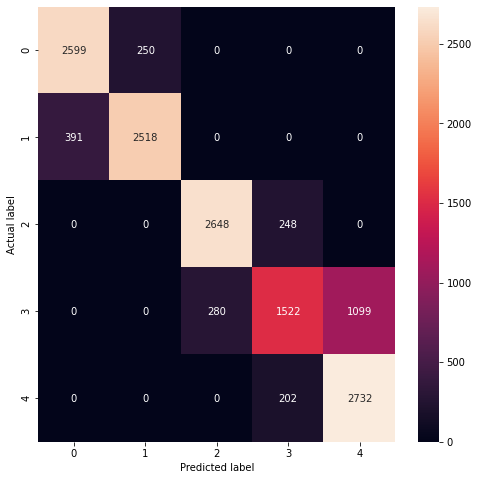

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [ ]:
pred_test=rf.predict(x_test)

#XGBoost Classifier

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print('F1 score:-',f1_score(y_test,y_pred,average='macro'))
print("Precisio score:-",precision_score(y_test,y_pred,average='macro'))
print("Training Accuracy:-",xgb.score(X_train, y_train))

              precision    recall  f1-score   support

           1       0.77      0.85      0.81      2849
           2       0.84      0.74      0.79      2909
           3       0.90      0.93      0.91      2896
           4       0.87      0.46      0.60      2901
           5       0.70      1.00      0.82      2934

    accuracy                           0.80     14489
   macro avg       0.81      0.80      0.79     14489
weighted avg       0.81      0.80      0.79     14489

F1 score:- 0.7873630337031778
Precisio score:- 0.8140940346188221
Training Accuracy:- 0.798763533100633


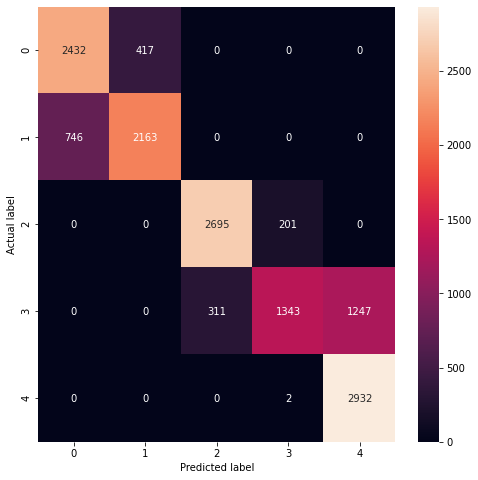

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

#Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print('F1 score:-',f1_score(y_true=y_test,y_pred=y_pred,average='macro'))
print("Precision score:-",precision_score(y_test,y_pred,average='macro'))
print("Training Accuracy:-",tree.score(X_train, y_train))

              precision    recall  f1-score   support

           1       0.81      0.82      0.82      2849
           2       0.82      0.81      0.82      2909
           3       0.91      0.91      0.91      2896
           4       0.65      0.67      0.66      2901
           5       0.76      0.74      0.75      2934

    accuracy                           0.79     14489
   macro avg       0.79      0.79      0.79     14489
weighted avg       0.79      0.79      0.79     14489

F1 score:- 0.7907236352830028
Precision score:- 0.7911057600777978
Training Accuracy:- 1.0


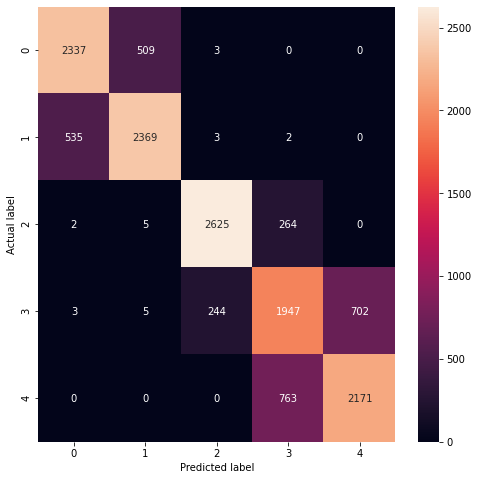

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax= plt.subplot()
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

#Gradient Boosting Classsifer

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()
gbrt.fit(X_train,y_train)
y_pred = gbrt.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print('F1 score:-',f1_score(y_true=y_test,y_pred=y_pred,average='macro'))
print("Precision score:-",precision_score(y_test,y_pred,average='macro'))
print("Training Accuracy:-",gbrt.score(X_train, y_train))

              precision    recall  f1-score   support

           1       0.78      0.84      0.81      2849
           2       0.83      0.77      0.80      2909
           3       0.92      0.92      0.92      2896
           4       0.81      0.53      0.64      2901
           5       0.71      0.96      0.82      2934

    accuracy                           0.80     14489
   macro avg       0.81      0.80      0.80     14489
weighted avg       0.81      0.80      0.80     14489

F1 score:- 0.7985136113291826
Precision score:- 0.8120589415687902
Training Accuracy:- 0.8190853694610424


#KNN Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print('F1 score:-',f1_score(y_true=y_test,y_pred=y_pred,average='macro'))
print("Precision score:-",precision_score(y_test,y_pred,average='macro'))
print("Training Accuracy:-",classifier.score(X_train, y_train))

              precision    recall  f1-score   support

           1       0.84      0.88      0.86      2849
           2       0.87      0.85      0.86      2909
           3       0.73      0.75      0.74      2896
           4       0.43      0.36      0.39      2901
           5       0.67      0.75      0.70      2934

    accuracy                           0.72     14489
   macro avg       0.71      0.72      0.71     14489
weighted avg       0.71      0.72      0.71     14489

F1 score:- 0.7105871975880123
Precision score:- 0.7075161948637404
Training Accuracy:- 0.8353546707685027


Boosting the score

In [ ]:
import sklearn.base as skb
class my_mixed_model(skb.BaseEstimator, skb.RegressorMixin, skb.TransformerMixin):

    def __init__(self, algs):
        self.algs = algs

    def fit(self, X, y):
        self.algs_ = [skb.clone(x) for x in self.algs]
        
       
        for alg in self.algs_:
            alg.fit(X, y)

        return self
    

    def predict(self, X):
        predictions = np.column_stack([
            stacked_model.predict(X) for stacked_model in self.algs_
        ])
        return (np.mean(predictions, axis=1)).astype('int64')

In [ ]:
boosted_model = my_mixed_model(algs = [xgb,rf,gbrt])
boosted_model.fit(X_train, y_train)

my_mixed_model(algs=[XGBClassifier(base_score=0.5, booster='gbtree',
                                   colsample_bylevel=1, colsample_bynode=1,
                                   colsample_bytree=1, gamma=0,
                                   learning_rate=0.1, max_delta_step=0,
                                   max_depth=3, min_child_weight=1,
                                   missing=None, n_estimators=100, n_jobs=1,
                                   nthread=None, objective='multi:softprob',
                                   random_state=0, reg_alpha=0, reg_lambda=1,
                                   scale_pos_weight=1, seed=None, sil...
                                                init=None, learning_rate=0.1,
                                                loss='deviance', max_depth=3,
                                                max_features=None,
                                                max_leaf_nodes=None,
                                                min_im

In [ ]:
y_pred = boosted_model.predict(x_test)

#File Submission

In [ ]:
'''sample_file=pd.DataFrame()

sample_file['churn_risk_score'] = pred_test
sample_file['customer_id']= test_copy['customer_id']'''

In [ ]:
'''pd.DataFrame(sample_file,columns=['customer_id','churn_risk_score']).to_csv('my_file1.csv',index=False)'''